<a href="https://colab.research.google.com/github/NochnoyRitzar/Ted-Talks-Analysis/blob/master/eda/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
# for plotting
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
np.random.seed(42)

In [3]:
# loading data
orig_df = pd.read_csv('https://raw.githubusercontent.com/NochnoyRitzar/Ted-Talks-Analysis/master/data/raw/talks_info.csv')
df = orig_df.copy()

## Initial look

In [4]:
df.head()

,_id,duration,event,likes,page_url,published_date,recorded_date,related_videos,speakers,subtitle_languages,summary,title,topics,transcript,views,youtube_video_code
0,21,992,TED2006,17K,https://www.ted.com/talks/mena_trott_meet_the_...,2006-08-25T00:11:00Z,2006-02-23,"[""144"",""1282"",""1379"",""87"",""2302"",""2638""]","[{""name"":""Mena Trott"",""occupation"":""Blogger; c...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...","The founding mother of the blog revolution, Mo...",Meet the founder of the blog revolution,"[{""id"":""4"",""name"":""culture""},{""id"":""13"",""name""...","Over the past couple of days, as I've been pre...",589115,RlBTxuWCuL8
1,1,957,TED2006,110K,https://www.ted.com/talks/al_gore_averting_the...,2006-06-27T00:11:00Z,2006-02-25,"[""243"",""547"",""2093"",""74405"",""64693"",""83767""]","[{""name"":""Al Gore"",""occupation"":""Climate advoc...","[{""name"":""Greek"",""code"":""el""},{""name"":""Gujarat...",With the same humor and humanity he exuded in ...,Averting the climate crisis,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...","Thank you so much, Chris. And it's truly a gre...",3671801,rDiGYuQicpA
2,7,1266,TED2006,60K,https://www.ted.com/talks/david_pogue_simplici...,2006-06-27T00:11:00Z,2006-02-24,"[""1725"",""2274"",""172"",""2664"",""2464"",""1268""]","[{""name"":""David Pogue"",""occupation"":""Technolog...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",New York Times columnist David Pogue takes aim...,Simplicity sells,"[{""id"":""10"",""name"":""technology""},{""id"":""36"",""n...","(Music: ""The Sound of Silence,"" Simon &amp; Ga...",2008487,NEjZt0y6OOw
3,47,1126,TEDGlobal 2005,80K,https://www.ted.com/talks/david_deutsch_chemic...,2006-09-12T00:11:00Z,2005-07-14,"[""2237"",""701"",""1095"",""1386"",""76211"",""242""]","[{""name"":""David Deutsch"",""occupation"":""Physici...","[{""name"":""Greek"",""code"":""el""},{""name"":""English...",Legendary scientist David Deutsch puts theoret...,Chemical scum that dream of distant quasars,"[{""id"":""3"",""name"":""climate change""},{""id"":""4"",...",We've been told to go out on a limb and say so...,2694257,gQliI_WGaGk
4,55,1524,TED2006,14K,https://www.ted.com/talks/jehane_noujaim_my_wi...,2006-07-25T00:11:00Z,2006-02-26,"[""2228"",""1476"",""800"",""2890"",""45233"",""2694""]","[{""name"":""Jehane Noujaim"",""occupation"":""Filmma...","[{""name"":""English"",""code"":""en""},{""name"":""Vietn...",Jehane Noujaim unveils her 2006 TED Prize wish...,My wish: A global day of film,"[{""id"":""4"",""name"":""culture""},{""id"":""6"",""name"":...",I can't help but this wish: to think about whe...,489757,QCFSrb6B5nw


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 5631 non-null   int64 
 1   duration            5631 non-null   int64 
 2   event               5630 non-null   object
 3   likes               5631 non-null   object
 4   page_url            5631 non-null   object
 5   published_date      5631 non-null   object
 6   recorded_date       5629 non-null   object
 7   related_videos      5631 non-null   object
 8   speakers            5631 non-null   object
 9   subtitle_languages  5631 non-null   object
 10  summary             5631 non-null   object
 11  title               5631 non-null   object
 12  topics              5631 non-null   object
 13  transcript          4983 non-null   object
 14  views               5631 non-null   int64 
 15  youtube_video_code  5462 non-null   object
dtypes: int64(3), object(13)


In [6]:
# check missing values
print(f'Overall entries in dataset: {df.shape[0]}')

# count number of missing values in all columns
df.isnull().sum()

Overall entries in dataset: 5631


_id                     0
duration                0
event                   1
likes                   0
page_url                0
published_date          0
recorded_date           2
related_videos          0
speakers                0
subtitle_languages      0
summary                 0
title                   0
topics                  0
transcript            648
views                   0
youtube_video_code    169
dtype: int64

**Column 'transcript'** - Some of the talks contain dancing and singing, some also had their transcript removed, that's why we have so many missing values
</br>
**Column 'youtube_video_code'** - Talks are usually published in 2 places: official TED website and Youtube, but some videos weren't uploaded to youtube, hence we have missing values

Check for duplicates

In [7]:
print(f'There are {df.duplicated().sum()} duplicated records')

There are 0 duplicated records


## Deeper look at columns

### Views column

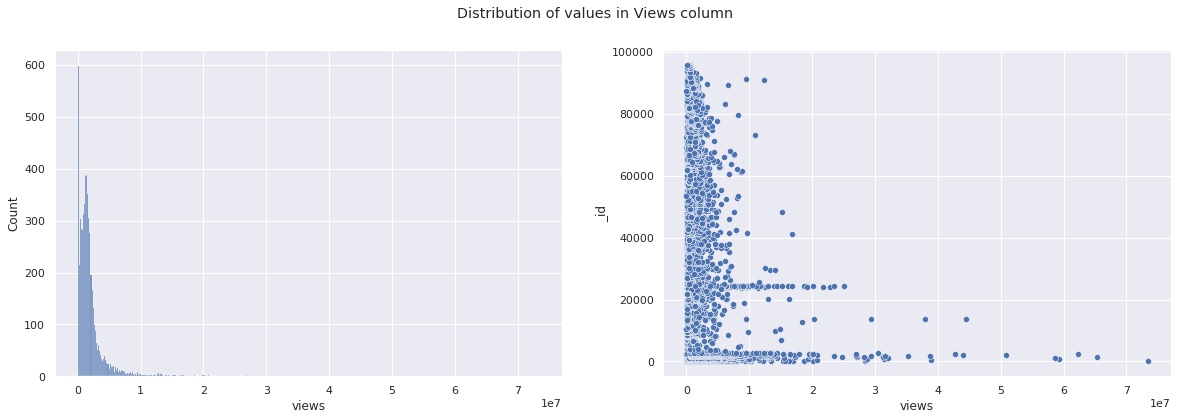

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
 
fig.suptitle('Distribution of values in Views column')

sns.histplot(ax=axes[0], data=df, x='views')
sns.scatterplot(ax=axes[1], data=df, x='views', y='_id')

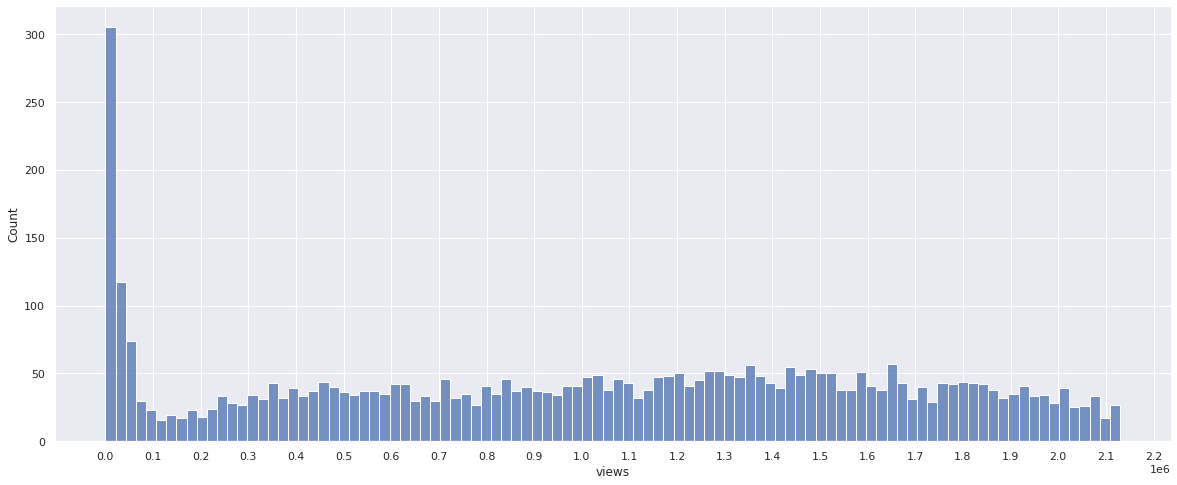

In [9]:
# closer look at the distribution
plt.figure(figsize=(20,8))
plt.xticks(np.arange(min(df['views']), max(df['views']), 100000))
# visualize amount of talks that have <= views than mean
hist = sns.histplot(x=df['views'].loc[df['views'] <= df['views'].mean()], bins=100)
plt.show()

In [10]:
df['views'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99]).apply('{:.2f}'.format)

count        5631.00
mean      2130394.21
std       3679481.02
min           587.00
25%        678154.00
50%       1392074.00
75%       2182299.50
95%       6440912.50
99%      16493103.90
max      73389142.00
Name: views, dtype: object

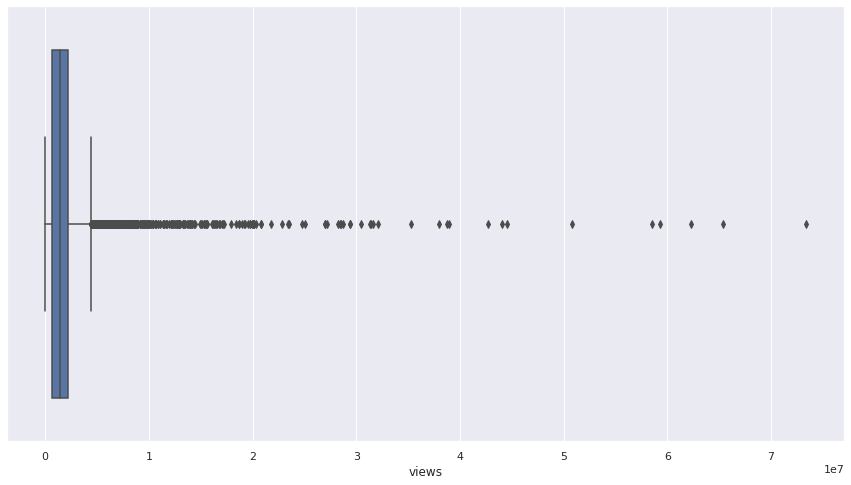

In [11]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['views'])

In [12]:
# interactive plot
px.box(df, x='views', orientation='h')

In [13]:
Q1 = np.percentile(df['views'], 25)
Q3 = np.percentile(df['views'], 75)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR
print(upper_fence)

4438517.75


In [14]:
print(f'There are currently {df.loc[df["views"] >= upper_fence].shape[0]} talks considered as outliers')

There are currently 501 talks considered as outliers


Count talks with low views count

In [15]:
print(f'There are {len(df["views"].loc[df["views"] < 10000])} talks with less than 10k views')
print(f'There are {len(df["views"].loc[df["views"] < 50000])} talks with less than 50k views')

There are 166 talks with less than 10k views
There are 449 talks with less than 50k views


In [16]:
px.scatter(df.loc[df['views'] < 50000], x='views', marginal_x="histogram", title='Distribution of low view count talks')

Plots showcase a large amount of outliers, we'll remove extreme cases later when cleaning data
***

### Duration column

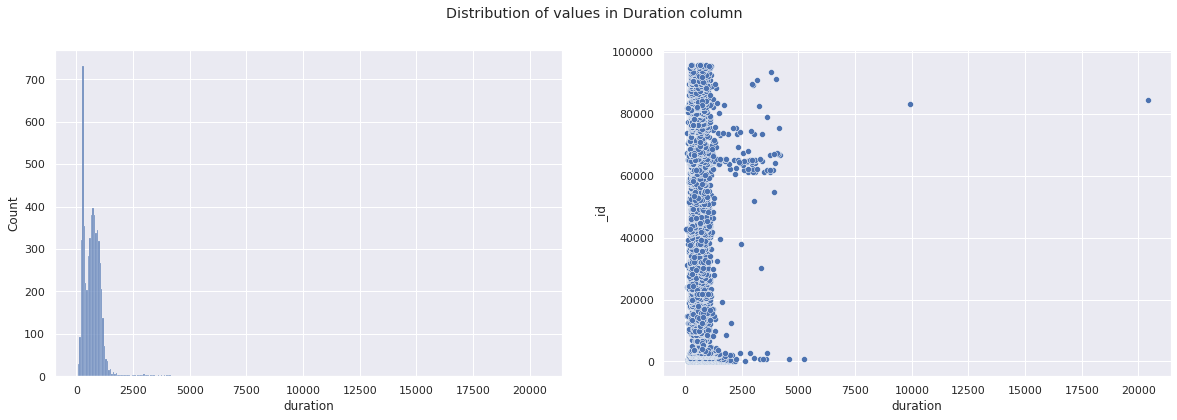

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
 
fig.suptitle('Distribution of values in Duration column')

sns.histplot(ax=axes[0], data=df, x='duration')
sns.scatterplot(ax=axes[1], data=df, x='duration', y='_id')

In [18]:
df['duration'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count     5631.000000
mean       707.691529
std        521.179373
min         60.000000
25%        355.000000
50%        682.000000
75%        926.500000
95%       1225.500000
99%       2565.600000
max      20404.000000
Name: duration, dtype: float64

In [19]:
px.box(df, x='duration', orientation='h', title='Duration boxplot')

I can see several severe cases of outliers in duration column

In [20]:
df.loc[df['duration'] > 4200]

,_id,duration,event,likes,page_url,published_date,recorded_date,related_videos,speakers,subtitle_languages,summary,title,topics,transcript,views,youtube_video_code
585,730,4587,Carnegie Mellon University,19K,https://www.ted.com/talks/randy_pausch_really_...,2010-01-08T11:32:00Z,2007-09-18,"[""229"",""1042"",""720"",""527"",""1126"",""835""]","[{""name"":""Randy Pausch"",""occupation"":""Professo...",[],"In 2007, Carnegie Mellon professor Randy Pausc...",Really achieving your childhood dreams,"[{""id"":""4"",""name"":""culture""},{""id"":""52"",""name""...",NaN,660270,ji5_MqicxSo
637,798,5257,University of California,15K,https://www.ted.com/talks/douglas_adams_parrot...,2010-03-16T17:54:00Z,2001-05-16,"[""635"",""1139"",""23422"",""24012"",""33931"",""23716""]","[{""name"":""Douglas Adams"",""occupation"":""Author,...",[],"Blind river dolphins, reclusive lemurs, a parr...","Parrots, the universe and everything","[{""id"":""76"",""name"":""biology""},{""id"":""85"",""name...",NaN,500746,_ZG8HBuDjgc
4822,84370,20404,Countdown,3.6K,https://www.ted.com/talks/ted_countdown_global...,2021-11-23T20:24:55Z,2020-10-10,"[""83266"",""66733"",""66922"",""66654"",""66940"",""48495""]","[{""name"":""Countdown"",""occupation"":""""}]",[],"This virtual event, streamed live on 10.10.202...",Countdown Global Launch 2020,"[{""id"":""3"",""name"":""climate change""},{""id"":""9"",...",NaN,122390,5dVcn8NjbwY
5296,83266,9915,Countdown,184K,https://www.ted.com/talks/ted_countdown_global...,2021-10-30T18:45:36Z,2021-10-30,"[""83262"",""66925"",""83259"",""32560"",""1380"",""66940""]","[{""name"":""Countdown"",""occupation"":""""}]",[],Combining new TED Talks with live performances...,Countdown Global Livestream 2021,"[{""id"":""3"",""name"":""climate change""},{""id"":""9"",...",NaN,6151386,SG_vqlb1pOQ


In [21]:
Q1 = np.percentile(df['duration'], 25)
Q3 = np.percentile(df['duration'], 75)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR
print(upper_fence)

1783.75


In [22]:
print(f'There are currently {df.loc[df["duration"] >= upper_fence].shape[0]} talks considered as outliers')

There are currently 89 talks considered as outliers



There are some potential outliers, but majority of the talks have duration of under 1250 seconds
***

### Event column

In [23]:
df['event'].value_counts()

TED-Ed                  865
TED2018                 104
TED2020                 102
TED2019                 101
TED2017                  97
                       ... 
TEDxIndianapolis          1
TEDSalon NY2015           1
TEDxSouthBank             1
TEDxMuncyStatePrison      1
TEDxSeattleWomen          1
Name: event, Length: 630, dtype: int64

In [24]:
plot = px.scatter(df['event'].value_counts())
plot.update_layout(xaxis_title="Event", yaxis_title="Count")
plot.show()

In [25]:
px.histogram(df['event'].value_counts(), title='Event frequency', nbins=200)


There a lot of events that had several talks, we can assign them label "Other".<br>
Also there are events like "TED Women 2010", "TED Women 2011" and so on. We'll group them into "TED Women" later when cleaning data

In [26]:
# Find events with year in the end
event_list = df['event'].loc[df['event'].str.contains(r"\d{4}$", na=False, regex=True)].unique()
for event in event_list:
    print(event)

TED2006
TEDGlobal 2005
TED2004
TED2005
TEDSalon 2006
TED2007
TED2003
TED2002
TEDGlobal 2007
TED2001
Skoll World Forum 2007
TED2008
TED1984
DLD 2007
TED1990
EG 2007
TED1998
LIFT 2007
TEDSalon 2008
Serious Play 2008
Taste3 2008
TED2009
EG 2008
TEDGlobal 2009
TEDIndia 2009
TEDSalon London 2009
TEDMED 2009
TEDxBoston 2009
TED2010
Web 2.0 Expo 2008
DICE Summit 2010
TEDSalon London 2010
TEDGlobal 2010
TEDxBoston 2010
TED Senior Fellows at TEDGlobal 2010
TEDxTelAviv 2010
TEDxDU 2010
TEDxRotterdam 2010
TEDWomen 2010
TEDSalon NY2011
TEDxToronto 2010
TEDMED 2010
TEDxGöteborg 2010
TEDxToronto 2011
TED2011
TEDActive 2011
TEDSalon London Spring 2011
TEDGlobal 2011
TEDxBoston 2011
TEDxParis 2010
TEDxBoulder 2011
TEDMED 2011
TEDxDU 2011
TEDxWomen 2011
TEDxZurich 2011
TEDSalon NY2012
TED1994
TEDSalon London Fall 2011
TED2012
TEDYouth 2011
TEDMED 2012
TEDSalon London Spring 2012
TEDGlobal 2012
TEDxBoston 2012
TEDSalon London Fall 2012
TEDxJaffa 2012
TEDxZurich 2012
TEDxWomen 2012
TEDSalon NY2013
TED201

In [27]:
ted_event_count = len(df['event'].loc[df['event'].str.contains(r"TED\d{4}", na=False, regex=True)])
print(f'There are {ted_event_count} official TED talks')

There are 1356 official TED talks


In [28]:
# There is an event named - 2015
df.loc[df['event'] == '2015']

,_id,duration,event,likes,page_url,published_date,recorded_date,related_videos,speakers,subtitle_languages,summary,title,topics,transcript,views,youtube_video_code
2401,2386,509,2015,17,https://www.ted.com/talks/year_in_ideas_2015,2015-11-30T20:41:15Z,2015-12-01,[],[],[],The Year In Ideas 2015.,Year In Ideas 2015,[],NaN,587,NaN


In [29]:
# Row with None value
df.loc[df['event'].isnull()]

,_id,duration,event,likes,page_url,published_date,recorded_date,related_videos,speakers,subtitle_languages,summary,title,topics,transcript,views,youtube_video_code
5614,94839,223,NaN,238,https://www.ted.com/talks/countdown_how_dilemm...,2022-07-08T16:15:03Z,2022-06-16,"[""83259"",""94157"",""86064""]","[{""name"":""Countdown"",""occupation"":""""}]","[{""name"":""English"",""code"":""en""}]","Throughout the world, we find ourselves faced ...","How ""dilemma thinking"" transforms argument int...","[{""id"":""3"",""name"":""climate change""},{""id"":""5"",...","Throughout the world, we find ourselves faced ...",7949,NaN


We'll drop them when cleaning data
***

### Likes column

In [30]:
df['likes'].head()

0     17K
1    110K
2     60K
3     80K
4     14K
Name: likes, dtype: object

In [31]:
df['likes'].value_counts()

43K     85
40K     84
38K     83
45K     79
47K     79
        ..
1.2M     1
702K     1
229K     1
357K     1
4.5K     1
Name: likes, Length: 743, dtype: int64

In [32]:
# separate regex search because of f-string errors
likes_count = len(df["likes"].loc[df["likes"].str.contains(r"^\d{1,3}$", regex=True)])
print(f'There are {likes_count} talks with less than 1000 likes')

likes_count = len(df["likes"].loc[df["likes"].str.contains(r"\S+K", regex=True)])
print(f'There are {likes_count} talks with >= 1K and < 1M likes')

likes_count = len(df["likes"].loc[df["likes"].str.contains(r"\S+M", regex=True)])
print(f'There are {likes_count} talks with >= 1M likes')

There are 374 talks with less than 1000 likes
There are 5244 talks with >= 1K and < 1M likes
There are 13 talks with >= 1M likes


In [33]:
def clean_likes_col(num):
    """
    Returns integer number from string
    :param num: number in string format
    :type num: str
    :rtype: int
    """
    if num[-1] == 'K':
        num = float(num[:-1]) * 1000
        if num >= 100000:
            # to get a bit of randomness in data
            num += np.random.randint(1, 1000)
        else:
            num += np.random.randint(1, 100)
    elif num[-1] == 'M':
        num = float(num[:-1]) * 1000000 + np.random.randint(1000, 10000)

    return int(num)

In [34]:
likes_series = df['likes'].apply(clean_likes_col)

px.histogram(likes_series, title='Distribution of the likes column')

Likes column contains strings representing like counter with bad precision so we'll have to convert values to integers
***

### Text columns (Title, Summary, Transcript)

Get text length of summary, title and transcript columns for each talk

In [35]:
summary_len_series = df['summary'].apply(lambda row: len(row))
title_len_series = df['title'].apply(lambda row: len(row))
transcript_len_series = df['transcript'].apply(lambda row: len(row) if isinstance(row, str) else 0)

In [36]:
summary_len_series.head()

0    250
1    233
2    202
3    230
4    121
Name: summary, dtype: int64

In [37]:
title_len_series.head()

0    39
1    27
2    16
3    43
4    29
Name: title, dtype: int64

In [38]:
transcript_len_series.head()

0    16066
1    11904
2    18469
3    15317
4    21396
Name: transcript, dtype: int64

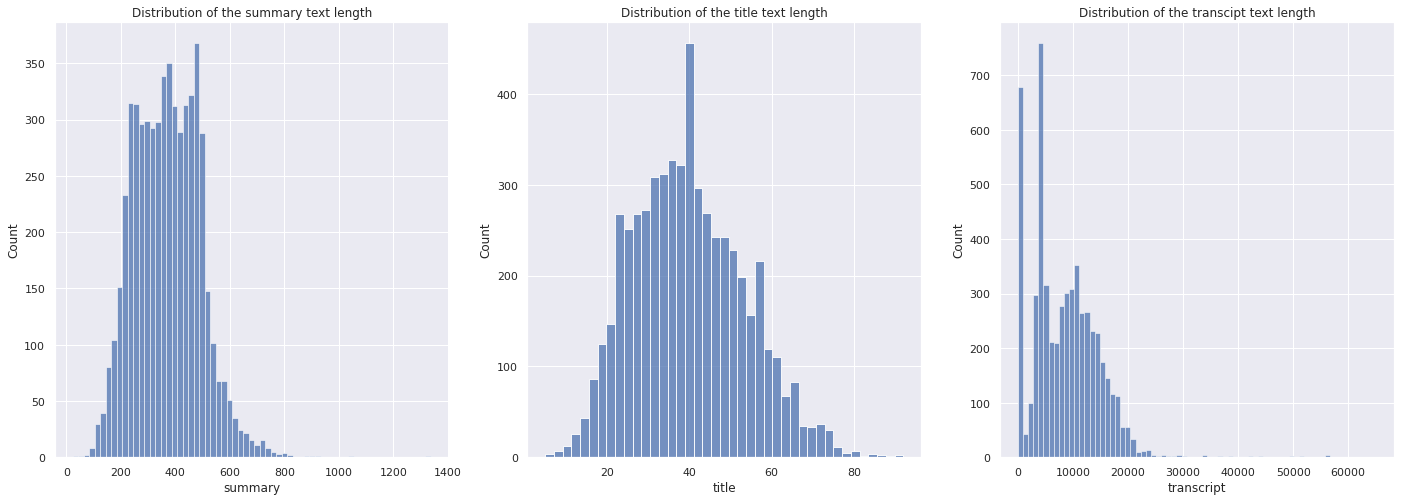

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

ax1 = sns.histplot(ax=axes[0], data=summary_len_series)
ax2 = sns.histplot(ax=axes[1], data=title_len_series)
ax3 = sns.histplot(ax=axes[2], data=transcript_len_series)

ax1.title.set_text('Distribution of the summary text length')
ax2.title.set_text('Distribution of the title text length')
ax3.title.set_text('Distribution of the transcipt text length')

Summary and title distributions look normal </br>
There are a lot of talks with empty transcripts as we saw earlier during initial look


---



### Published date column

In [40]:
series = pd.to_datetime(df['published_date']).dt.date.value_counts().sort_index()
fig = px.histogram(
    x=series.index, 
    y=series, 
    nbins=200, 
    labels={'x': 'Published Date', 'y':'talks published that month'}, 
    title='Monthly count of published talks'
)
fig.update_layout(bargap=0.03)

Monthly number of talks published has increased significantly after July 2017


---

### Columns with list as cell values

In [41]:
for col in ['related_videos', 'speakers', 'subtitle_languages', 'topics']:
    print(df[col].head(), end='\n\n')

0        ["144","1282","1379","87","2302","2638"]
1    ["243","547","2093","74405","64693","83767"]
2      ["1725","2274","172","2664","2464","1268"]
3      ["2237","701","1095","1386","76211","242"]
4     ["2228","1476","800","2890","45233","2694"]
Name: related_videos, dtype: object

0    [{"name":"Mena Trott","occupation":"Blogger; c...
1    [{"name":"Al Gore","occupation":"Climate advoc...
2    [{"name":"David Pogue","occupation":"Technolog...
3    [{"name":"David Deutsch","occupation":"Physici...
4    [{"name":"Jehane Noujaim","occupation":"Filmma...
Name: speakers, dtype: object

0    [{"name":"English","code":"en"},{"name":"Vietn...
1    [{"name":"Greek","code":"el"},{"name":"Gujarat...
2    [{"name":"Greek","code":"el"},{"name":"English...
3    [{"name":"Greek","code":"el"},{"name":"English...
4    [{"name":"English","code":"en"},{"name":"Vietn...
Name: subtitle_languages, dtype: object

0    [{"id":"4","name":"culture"},{"id":"13","name"...
1    [{"id":"3","name":"climate chan

We have 4 columns that have lists as values:
1.   speakers
2.   subtitle_languages
3.   topics
4.   related_videos

Those lists are actually strings to we'll need to convert them to python lists.
We can use literal_eval from ast to do that.

In [42]:
cols_with_list_values = ['speakers', 'subtitle_languages', 'topics', 'related_videos']

In [43]:
print(f'Before conversion: {type(df["subtitle_languages"][0])}')

for col in cols_with_list_values:
    df[col] = df[col].apply(literal_eval)

print(f'After conversion: {type(df["subtitle_languages"][0])}')

Before conversion: <class 'str'>
After conversion: <class 'list'>


Let's check how many rows in columns have empty lists as values

In [44]:
for col in cols_with_list_values:
    print(f'Column {col} has - {len(df[df[col].str.len() == 0])} empty cells')

Column speakers has - 14 empty cells
Column subtitle_languages has - 618 empty cells
Column topics has - 12 empty cells
Column related_videos has - 4 empty cells


In [45]:
num_topics_series = df['topics'].str.len()
px.histogram(num_topics_series, title='Distribution of the number of talk topics')

In [46]:
# Check if it shows correct output
num_topics = 5
for topics in df['topics'].loc[df['topics'].str.len() == num_topics][:2]:
    print(topics)

[{'id': '4', 'name': 'culture'}, {'id': '13', 'name': 'design'}, {'id': '44', 'name': 'architecture'}, {'id': '46', 'name': 'collaboration'}, {'id': '95', 'name': 'library'}]
[{'id': '8', 'name': 'science'}, {'id': '10', 'name': 'technology'}, {'id': '57', 'name': 'disease'}, {'id': '59', 'name': 'health'}, {'id': '66', 'name': 'cancer'}]


In [47]:
num_sub_lang_series = df['subtitle_languages'].str.len()
px.histogram(num_sub_lang_series, title='Distribution of the number of talk subtitle languages')

In [48]:
num_speakers_series = df['speakers'].str.len()
px.histogram(num_speakers_series, title='Distribution of the number of talk speakers')

In [49]:
num_speakers_series.value_counts().sort_index()

0       14
1     5321
2      238
3       42
4        5
5        5
6        1
10       1
13       2
14       1
16       1
Name: speakers, dtype: int64

In [50]:
num_related_videos_series = df['related_videos'].str.len()
px.histogram(num_related_videos_series, title='Distribution of the number of related videos')

In [51]:
num_related_videos_series.value_counts().sort_index()

0       4
1       4
2      16
3     416
4      22
5      33
6    5136
Name: related_videos, dtype: int64

Further feature engineering and data cleaning are required to gain meaningful information
***

## Bivariate Analysis

In [52]:
# dataframe with rows having less than 20k views
df_low_view_count = df.loc[df['views'] < 20000].copy()
index_list = df_low_view_count.index

In [53]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Views vs Number of topics", "Views vs Duration"))

# add graphs
fig.add_trace(
    go.Scatter(x=num_topics_series.loc[index_list], y=df_low_view_count['views'], mode='markers'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df_low_view_count['views'], y=df_low_view_count['duration'], mode='markers'),
    row=1, col=2
)

# Update xaxis properties
fig.update_xaxes(title_text="number of topics", row=1, col=1)
fig.update_xaxes(title_text="views", row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="views", row=1, col=1)
fig.update_yaxes(title_text="duration", row=1, col=2)

fig.update_layout(height=600, width=1000)
fig.show()

In [54]:
px.scatter(data_frame=df, x='views', y='duration', title='Views vs Duration')

In [55]:
df.loc[df['views'] == 122390]

,_id,duration,event,likes,page_url,published_date,recorded_date,related_videos,speakers,subtitle_languages,summary,title,topics,transcript,views,youtube_video_code
4822,84370,20404,Countdown,3.6K,https://www.ted.com/talks/ted_countdown_global...,2021-11-23T20:24:55Z,2020-10-10,"[83266, 66733, 66922, 66654, 66940, 48495]","[{'name': 'Countdown', 'occupation': ''}]",[],"This virtual event, streamed live on 10.10.202...",Countdown Global Launch 2020,"[{'id': '3', 'name': 'climate change'}, {'id':...",NaN,122390,5dVcn8NjbwY


This event was very long and got little views, might delete it later

In [56]:
px.scatter(
    x=df['views'], 
    y=likes_series, 
    title='Likes vs Views', 
    labels={'x': 'Views', 'y': 'Likes'},
    trendline='ols',
    trendline_color_override='red'
)

Relationship between likes count and views is linear

In [57]:
px.scatter(
    x=transcript_len_series, 
    y=df['duration'], 
    title='Transcript length vs Duration', 
    labels={'x':'Transcript length', 'y':'Talk duration'})

There are events with no transcripts, but overall relationship between transcript length and duration is linear, as would be expected

In [58]:
px.scatter(
    x=num_topics_series, 
    y=df['views'], 
    labels={'x': 'Number of topics', 'y': 'Views'}, 
    title='Distribution of views across number of topics'
)

In [59]:
num_topics_series = df['topics'].apply(lambda row: len(row))
px.histogram(
    x=num_topics_series, 
    y=df['views'], 
    labels={'x': 'Number of topics', 'y': 'Views'}, 
    title='Sum of views across number of topics'
)

Thanks a lot for checking out my notebook!